<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221222_Process_of_NLP_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/08/29/process-of-nlp-using-python/

In [28]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
import string

from google.colab import files
import zipfile
import io

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
upload = files.upload()

Saving IMDB_50k_movie_reviews.zip to IMDB_50k_movie_reviews.zip


In [6]:
z = zipfile.ZipFile(io.BytesIO(upload['IMDB_50k_movie_reviews.zip']))
z.namelist()

['IMDB Dataset.csv']

In [7]:
filenames = z.namelist()[0]
f = z.open(filenames)
data = pd.read_csv(f)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

In [14]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [15]:
data['clean'] = data['review'].apply(clean)

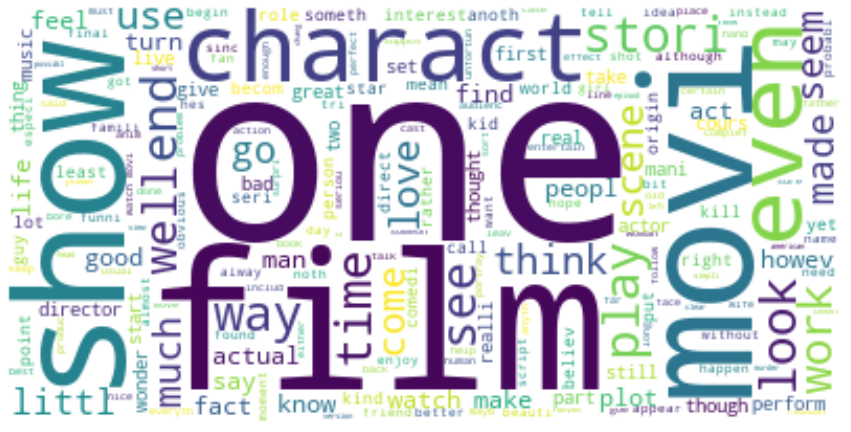

In [18]:
text = ' '.join(i for i in data['clean'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
 2   clean      50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [22]:
x = np.array(data['clean'])
y = np.array(data['sentiment'])
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)
xtrain.shape, xtest.shape, ytest.shape, ytrain.shape

((40000, 173746), (10000, 173746), (10000,), (40000,))

In [23]:
model = PassiveAggressiveClassifier()
model.fit(xtrain, ytrain)

PassiveAggressiveClassifier()

In [29]:
ypred = model.predict(xtest)

In [25]:
test = 'one of the worst movies I have ever seen!'

In [27]:
user = test
u_data = cv.transform([user]).toarray()
output = model.predict(u_data)
print(output)

['negative']


In [33]:
print(f'Classification Report: \n\n{metrics.classification_report(ytest, ypred)}')

Classification Report: 

              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4907
    positive       0.87      0.86      0.87      5093

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [35]:
print(f'Accuracy Score: \n{metrics.accuracy_score(ytest, ypred) * 100} %')

Accuracy Score: 
86.49 %
